<a href="https://colab.research.google.com/github/shhesterka04/q_prj/blob/main/qiskit_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Lab 1 Quantum Circuits](https://learn.qiskit.org/course/ch-labs/lab-1-quantum-circuits)

In [ ]:
!pip install qiskit 
!pip install pylatexenc

In [ ]:
%matplotlib inline

In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

# Goal

Create quantum circuit functions that can compute the 
- XOR, 
- AND
- NAND
- OR gates 
**using**
- the NOT gate (expressed as x in Qiskit)
- the CNOT gate (expressed as cx in Qiskit)
- the Toffoli gate (expressed as ccx in Qiskit).

In [ ]:
def NOT(inp):
  """
  Реализация NOT гейта
  На ввод идет inp (str) - кубит с индексом 0
  На вывод идет противоположное значение кубита с индексом 0
  """
  qc = QuantumCircuit(1,1) # 1 кубит и 1 бит
  qc.reset(0)

  # По умолчанию у нас стоит 0, если мы получаем на ввод не ноль, то состояние
  # Нужно инвертировать
  if inp == "1":
    qc.x(0)

  qc.barrier()
  qc.x(0) # Реализуем сам NOT
  qc.barrier()

  # Измерение кубита
  qc.measure(0,0)
  qc.draw("mpl")

  backend = Aer.get_backend("aer_simulator")
  job = backend.run(qc, shorts = 1, memory = True)
  output = job.result().get_memory()[0]

  return qc,output

NOT with input 0 gives output 1


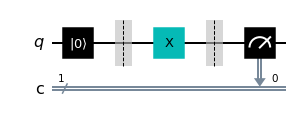



NOT with input 1 gives output 0


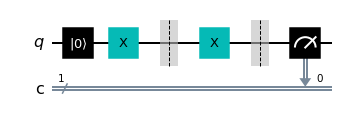

In [ ]:
# Тест
for inp in ['0', '1']:
  qc, out = NOT(inp)
  print('NOT with input',inp,'gives output',out)
  display(qc.draw('mpl'))
  print('\n')

# XOR gate
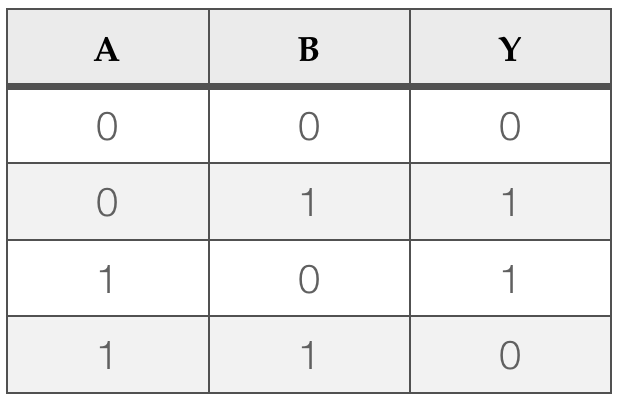


In [ ]:
def XOR(inp1, inp2):
  """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
  """
  qc = QuantumCircuit(2,2)
  qc.reset(range(2))

  if inp1 == "1":
    qc.x(0)
  if inp2 == "1":
    qc.x(1)

  qc.barrier()
  
  qc.cx(0,1)

  qc.barrier()

  qc.measure(1,0)

  backend = Aer.get_backend("aer_simulator")

  job = backend.run(qc, shots = 1, memory = True)
  output = job.result().get_memory()[0]

  return qc, output

XOR with inputs 0 0 gives output 00


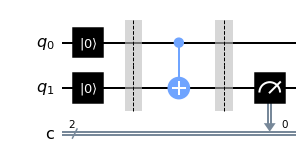



XOR with inputs 0 1 gives output 01


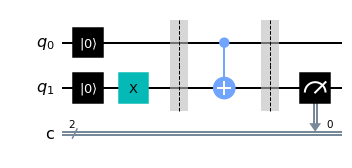



XOR with inputs 1 0 gives output 01


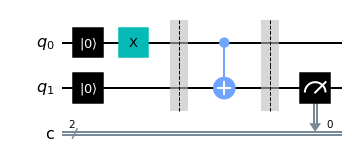



XOR with inputs 1 1 gives output 00


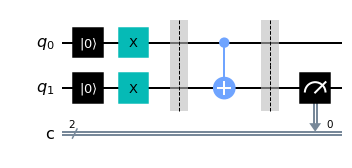

In [ ]:
for inp1 in ["0", "1"]:
  for inp2 in ['0', '1']:
    qc, output = XOR(inp1, inp2)
    print('XOR with inputs',inp1,inp2,'gives output',output)
    display(qc.draw('mpl'))
    print('\n')

# AND gate
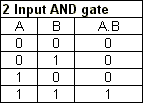

In [ ]:
def AND(inp1,inp2):
  """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
  """
  qc = QuantumCircuit(3,1)
  qc.reset(range(2))

  if inp1=='1':
    qc.x(0)
  if inp2=='1':
    qc.x(1)
        
  qc.barrier()

  qc.ccx(0,1,2)

  qc.barrier()
  qc.measure(2, 0) # output from qubit 2 is measured
  
  # We'll run the program on a simulator
  backend = Aer.get_backend('aer_simulator')
  # Since the output will be deterministic, we can use just a single shot to get it
  job = backend.run(qc, shots=1, memory=True)
  output = job.result().get_memory()[0]
  
  return qc, output

AND with inputs 0 0 gives output 0


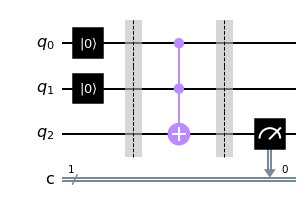



AND with inputs 0 1 gives output 0


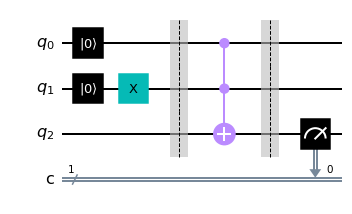



AND with inputs 1 0 gives output 0


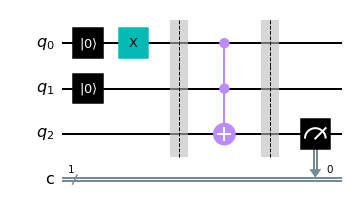



AND with inputs 1 1 gives output 1


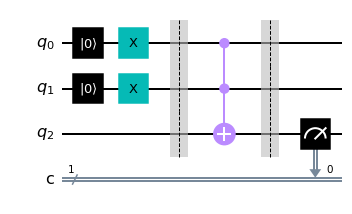

In [ ]:
for inp1 in ['0', '1']:
  for inp2 in ['0', '1']:
    qc, output = AND(inp1, inp2)
    print('AND with inputs',inp1,inp2,'gives output',output)
    display(qc.draw('mpl'))
    print('\n')

# NAND gate
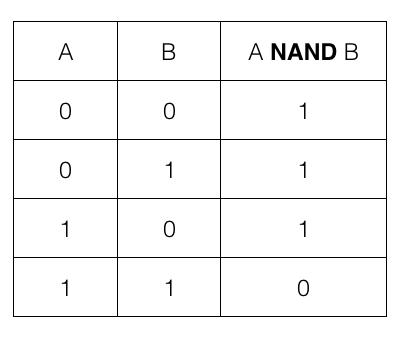

In [ ]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    qc.ccx(0,1,2)
    qc.x(2)
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

NAND with inputs 0 0 gives output 1


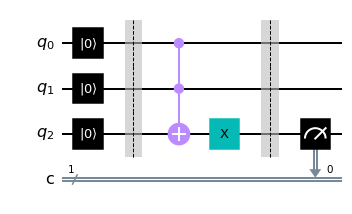



NAND with inputs 0 1 gives output 1


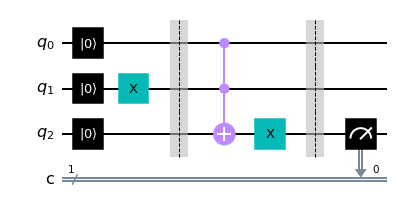



NAND with inputs 1 0 gives output 1


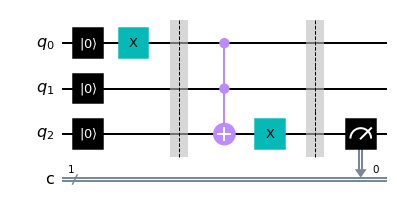



NAND with inputs 1 1 gives output 0


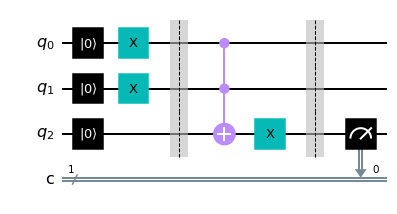

In [ ]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw('mpl'))
        print('\n')

# OR gate

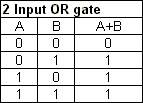

In [ ]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes
    qc.x(0)
    qc.x(1)
    qc.ccx(0,1,2)
    qc.x(2)
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

OR with inputs 0 0 gives output 0


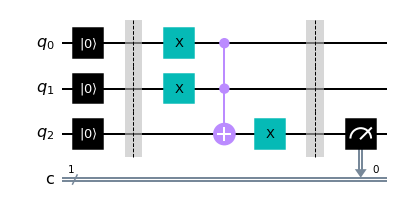



OR with inputs 0 1 gives output 1


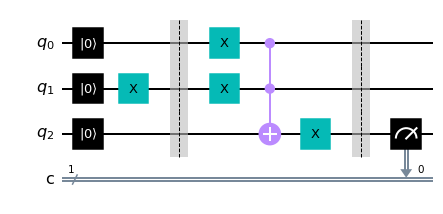



OR with inputs 1 0 gives output 1


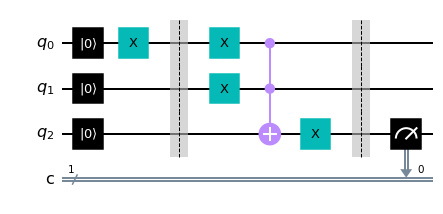



OR with inputs 1 1 gives output 1


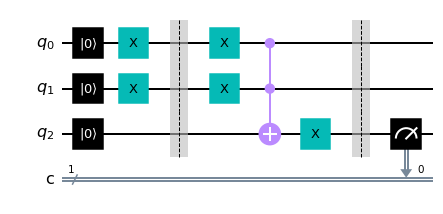

In [ ]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw('mpl'))
        print('\n')

# Part 2: AND gate on Quantum Computer
Goal

Execute AND gate on a real quantum system and learn how the noise properties affect the result.

In [ ]:
IBMQ.save_account('')
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
import qiskit.tools.jupyter

backend_ex = provider.get_backend('ibmq_lima')
backend_ex

In [ ]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

<IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
# run this cell
backend = provider.get_backend('ibmq_jakarta')

Step 2. Define AND function for a real device

AND gate


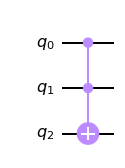



Transpiled AND gate with all the required connectivity


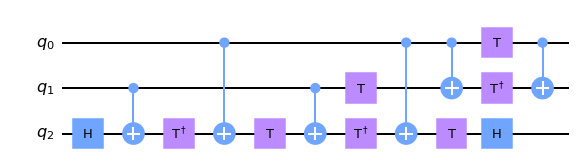

In [ ]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw('mpl'))
print('\n\nTranspiled AND gate with all the required connectivity')
qc_and.decompose().draw('mpl')

In [ ]:
from qiskit.tools.monitor import job_monitor

In [ ]:
# run the cell to define AND gate for real quantum system

def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = backend.run(qc_trans, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

In [ ]:
backend

<IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
layout = [0,1,2]

In [ ]:
output_all = []
qc_trans_all = []
prob_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans, output = AND(input1, input2, backend, layout)
        
        output_all.append(output)
        qc_trans_all.append(qc_trans)
        
        prob = output[str(int( input1=='1' and input2=='1' ))]/8192
        prob_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print('{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

6410e844d9ff78a12905e743
Job Status: job has successfully run

Probability of correct answer for inputs 0 0
0.83
---------------------------------
6410e85ab3c2d16080b0ea3c
Job Status: job has successfully run

Probability of correct answer for inputs 0 1
0.90
---------------------------------
6410e86eb3c2d110c0b0ea40
Job Status: job has successfully run

Probability of correct answer for inputs 1 0
0.91
---------------------------------
6410e882d9ff782ebe05e746
Job Status: job has successfully run

Probability of correct answer for inputs 1 1
0.83
---------------------------------


The highest of these probabilities was 0.91
The lowest of these probabilities was 0.83


Transpiled AND gate circuit for ibmq_vigo with input 0 0

The circuit depth : 21
# of nonlocal gates : 15
Probability of correct answer : 0.83


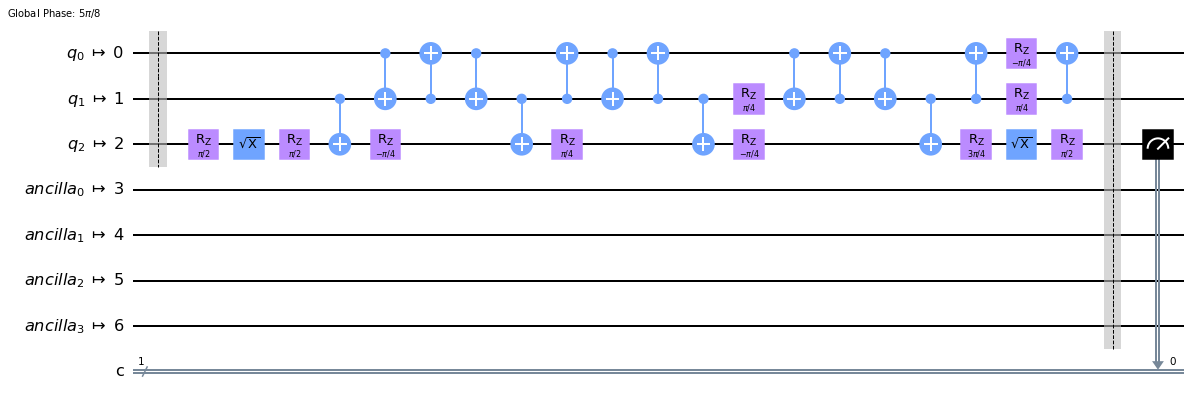

In [ ]:
print('Transpiled AND gate circuit for ibmq_vigo with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[0]) )
qc_trans_all[0].draw('mpl')

Transpiled AND gate circuit for ibmq_vigo with input 0 1

The circuit depth : 22
# of nonlocal gates : 15
Probability of correct answer : 0.90


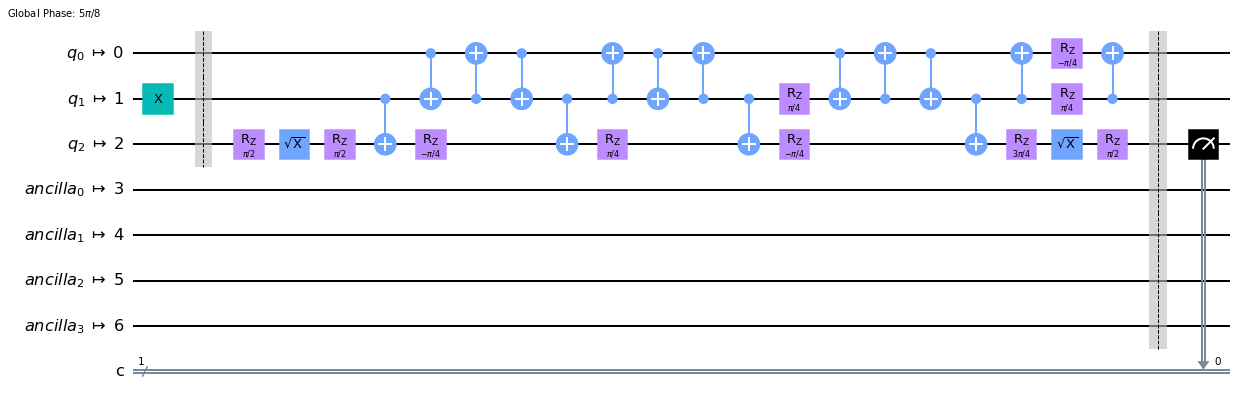

In [ ]:
print('Transpiled AND gate circuit for ibmq_vigo with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[1]) )
qc_trans_all[1].draw('mpl')

Transpiled AND gate circuit for ibmq_vigo with input 1 0

The circuit depth : 22
# of nonlocal gates : 15
Probability of correct answer : 0.91


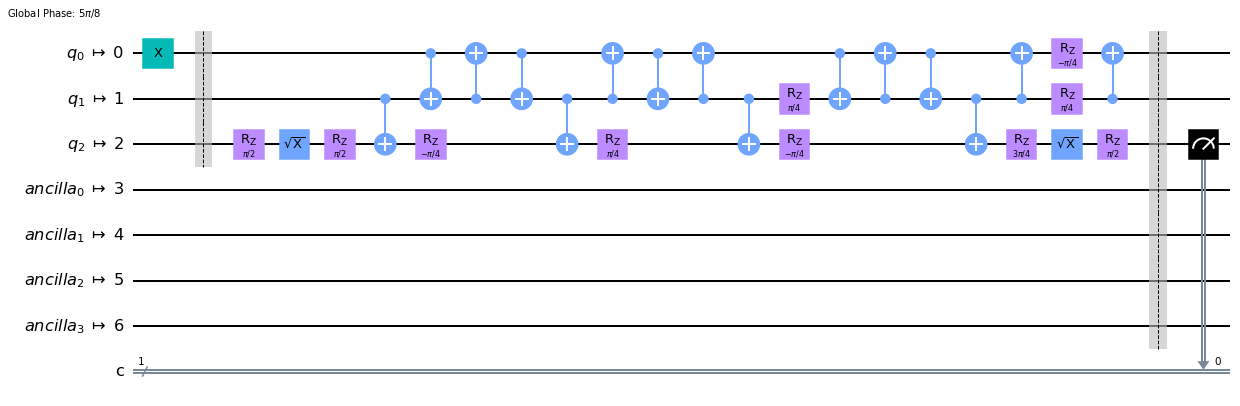

In [ ]:
print('Transpiled AND gate circuit for ibmq_vigo with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[2]) )
qc_trans_all[2].draw('mpl')

Transpiled AND gate circuit for ibmq_vigo with input 1 1

The circuit depth : 22
# of nonlocal gates : 15
Probability of correct answer : 0.83


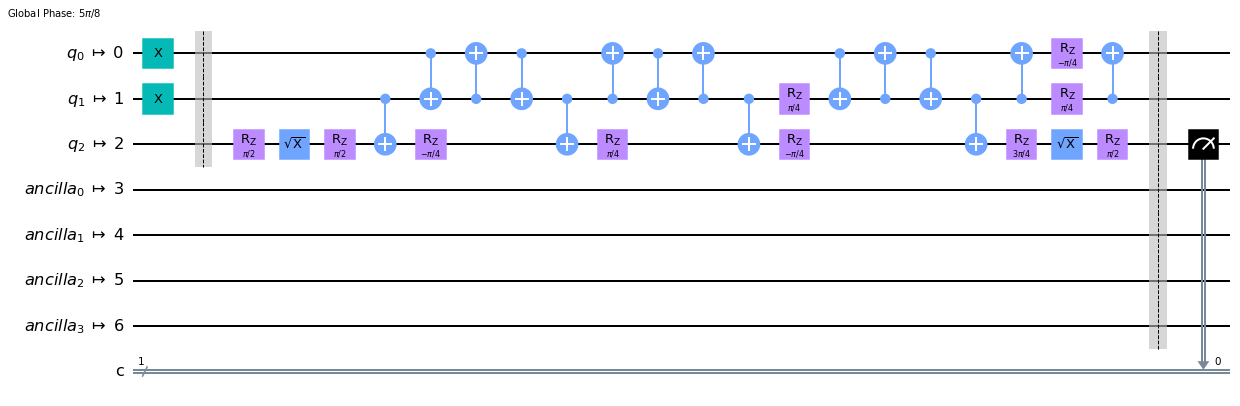

In [ ]:
print('Transpiled AND gate circuit for ibmq_vigo with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[3]) )
qc_trans_all[3].draw('mpl')